<h1>QUANTUM TELEPORTATION </h1>
In this notebook will be executed the quantum teleportation algorithm both in cirq and qiskit.
<br>
The only assumption we made is that the state sent is $$ |\psi \rangle = \frac{(|0 \rangle + |1 \rangle)}{\sqrt{2}} $$
The circuit is made as in the image:

![alt text](qteleportation.jpeg "Title")

In [1]:
import cirq
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)

<h2>CIRQ SCRIPT

In [2]:
q0, q1, q2 = [cirq.LineQubit(i) for i in range(3)]
circuit = cirq.Circuit()

#entagling the 2 quibits in different laboratories
#and preparing the qubit to send
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.CNOT(q1, q2))

#entangling the qubit we want to send to the one in the first laboratory
circuit.append(cirq.CNOT(q0, q1))
circuit.append(cirq.H(q0))

#measurements
circuit.append(cirq.measure(q0, q1))

#last transformations to obtain the qubit information
circuit.append(cirq.CNOT(q1, q2))
circuit.append(cirq.CZ(q0, q2))

#measure of the qubit in the receiving laboratory along z axis
circuit.append(cirq.measure(q2, key = 'Z'))
circuit

0: ───H───────@───H───M───────@────────────
              │       │       │
1: ───H───@───X───────M───@───┼────────────
          │               │   │
2: ───────X───────────────X───@───M('Z')───

(44, 56)

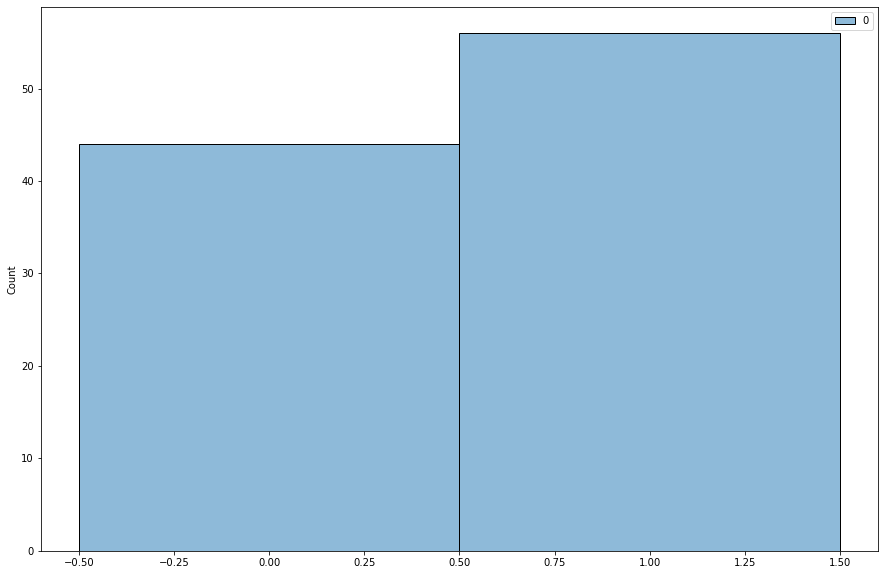

In [3]:
#starting simulation
sim = cirq.Simulator()
results = sim.run(circuit, repetitions=100)
sns.histplot(results.measurements['Z'], discrete = True)
100 - np.count_nonzero(results.measurements['Z']), np.count_nonzero(results.measurements['Z'])

<h2>QISKIT SCRIPT

In [4]:
#in qiskit the qubits are integrated in the circuit
qc = QuantumCircuit(3, 1)

#entangling 
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)

#setting for measurment
qc.h(0)
qc.measure([0,1], [0,0])

#transformation to obtain qubit sent
qc.cx(1, 2)
qc.cz(0, 2)
qc.measure(2, 0)
print(qc)

     ┌───┐          ┌───┐┌─┐              
q_0: ┤ H ├───────■──┤ H ├┤M├─────────■────
     ├───┤     ┌─┴─┐└───┘└╥┘┌─┐      │    
q_1: ┤ H ├──■──┤ X ├──────╫─┤M├──■───┼────
     └───┘┌─┴─┐└───┘      ║ └╥┘┌─┴─┐ │ ┌─┐
q_2: ─────┤ X ├───────────╫──╫─┤ X ├─■─┤M├
          └───┘           ║  ║ └───┘   └╥┘
c: 1/═════════════════════╩══╩══════════╩═
                          0  0          0 


{'1': 50, '0': 50}

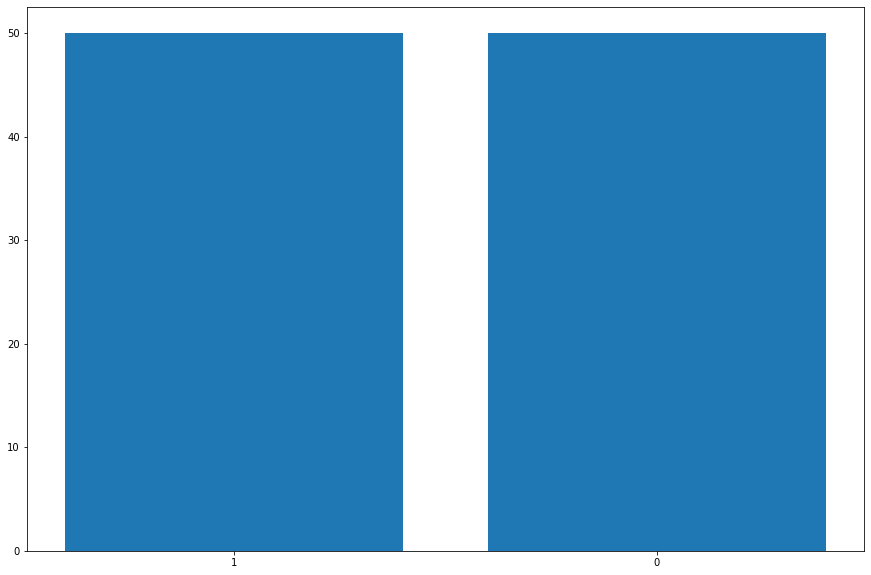

In [5]:
#simulation
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=100)
res = job.result().get_counts(qc)
plt.bar(res.keys(), res.values())
res